In [17]:
ls

1_1: Distribution of Request Lengths.png
1_2: Distribution of Inter-Arrival Times.png
1_3: Distribution Comparisons (req_len).png
1_4: Distribution Comparisons (inter_arrival).png
2_2: Avg Resp Time, Avg Queue Len by Utilization.png
a1.txt
a10.txt
a11.txt
a12.txt
a13.txt
a14.txt
a15.txt
a2.txt
a3.txt
a4.txt
a5.txt
a6.txt
a7.txt
a8.txt
a9.txt
client*
client-output.txt
hw2_eval1_1.txt
hw2_eval2_1.txt
server-output.txt
server_mt*
server_mt.o
server_q*
server_q.o
timelib.o


In [18]:
import numpy as np, pandas as pd
import re, copy
import matplotlib.pyplot as plt

In [19]:
########### EVAL 2(a) ###########

In [20]:
df = pd.read_fwf('hw2_eval2_1.txt', header=None)

In [21]:
df.rename(columns={df.columns[0]: 'req_opt'}, inplace=True)

In [22]:
print("two types of lines to deal with:")
#R<request ID>:<sent timestamp>,<request length>,<receipt timestamp>,<start timestamp>,<completion timestamp>
print("1st type:", df['req_opt'][0])
print("2nd type:", df['req_opt'][9])

two types of lines to deal with:
1st type: R0:204359.065068,0.033434,204359.065767,204359.066216,204359.099776
2nd type: Q:[R5,R6,R7]


In [23]:
df_copy = df.copy()
for i in range(len(df_copy['req_opt'])):
    df_copy['req_opt'][i] = re.sub(r"^(.*):|\[|\]", '', df_copy['req_opt'][i])
    df_copy['req_opt'][i] = re.split(r",", df_copy['req_opt'][i])
    if i % 2 == 0:
        df_copy['req_opt'][i][:] = map(lambda x: float(x), df_copy['req_opt'][i]) 
        df_copy['req_opt'][i] = df_copy['req_opt'][i][-1]
    else:
        cnt = 0
        for elem in df_copy['req_opt'][i]:
            if elem != '':
                cnt += 1
        df_copy['req_opt'][i] = cnt

In [24]:
print(df_copy[:40])

          req_opt
0   204359.099776
1               0
2   204359.303081
3               0
4   204359.320128
5               0
6   204359.576297
7               2
8   204359.630343
9               3
10  204359.696501
11              2
12  204359.744603
13              1
14  204359.909927
15              2
16  204359.994202
17              6
18  204360.056539
19              5
20  204360.075142
21              4
22   204360.18389
23              3
24  204360.218133
25              2
26  204360.225855
27              1
28  204360.242305
29              0
30  204360.554486
31              2
32  204360.577923
33              1
34  204360.627493
35              1
36  204360.867809
37              5
38  204360.966248
39              6


In [25]:
df_copy.iloc[2]

req_opt    204359.303081
Name: 2, dtype: object

In [26]:
print(df_copy['req_opt'][1998]-df_copy['req_opt'][0])

72.53847400000086


In [27]:
# [(2-0)*1, (4-2)*3, (6-4)*5, ... , (1998-1996)*1997] 
each_weighted_queue_len = []
cnt = 0
for i in range(0, len(df_copy) - 2, 2):
    each = (df_copy.iloc[i + 2][0] - df_copy.iloc[i][0]) * df_copy.iloc[i + 1][0]
    each_weighted_queue_len += [each]
    cnt += 1
    print(f"R{cnt} = ({df_copy.iloc[i + 2][0]}-{df_copy.iloc[i][0]})*{df_copy.iloc[i + 1][0]} = {each}")
    
weighted_queue_len = sum(each_weighted_queue_len) / (df_copy.iloc[1998]-df_copy.iloc[0])
weighted_queue_len

R1 = (204359.303081-204359.099776)*0 = 0.0
R2 = (204359.320128-204359.303081)*0 = 0.0
R3 = (204359.576297-204359.320128)*0 = 0.0
R4 = (204359.630343-204359.576297)*2 = 0.10809200000949204
R5 = (204359.696501-204359.630343)*3 = 0.198474000004353
R6 = (204359.744603-204359.696501)*2 = 0.09620400000130758
R7 = (204359.909927-204359.744603)*1 = 0.16532400000141934
R8 = (204359.994202-204359.909927)*2 = 0.16855000000214204
R9 = (204360.056539-204359.994202)*6 = 0.37402200006181374
R10 = (204360.075142-204360.056539)*5 = 0.0930149998748675
R11 = (204360.18389-204360.075142)*4 = 0.4349919999949634
R12 = (204360.218133-204360.18389)*3 = 0.10272900000563823
R13 = (204360.225855-204360.218133)*2 = 0.015444000018760562
R14 = (204360.242305-204360.225855)*1 = 0.01644999999552965
R15 = (204360.554486-204360.242305)*0 = 0.0
R16 = (204360.577923-204360.554486)*2 = 0.04687399999238551
R17 = (204360.627493-204360.577923)*1 = 0.04957000000285916
R18 = (204360.867809-204360.627493)*1 = 0.2403159999812487

R843 = (204419.85577-204419.81523)*1 = 0.04053999998723157
R844 = (204419.99913-204419.85577)*0 = 0.0
R845 = (204420.12394-204419.99913)*1 = 0.12480999997933395
R846 = (204420.27279-204420.12394)*2 = 0.29769999999552965
R847 = (204420.32004-204420.27279)*2 = 0.09450000000651926
R848 = (204420.4121-204420.32004)*1 = 0.09205999999539927
R849 = (204420.82002-204420.4121)*0 = 0.0
R850 = (204420.84047-204420.82002)*9 = 0.1840499998361338
R851 = (204420.85567-204420.84047)*8 = 0.12159999995492399
R852 = (204421.01231-204420.85567)*7 = 1.096480000007432
R853 = (204421.06295-204421.01231)*10 = 0.5064000000129454
R854 = (204421.09144-204421.06295)*9 = 0.256409999972675
R855 = (204421.1322-204421.09144)*8 = 0.3260800000280142
R856 = (204421.17042-204421.1322)*8 = 0.30576000013388693
R857 = (204421.29256-204421.17042)*7 = 0.854979999945499
R858 = (204421.3517-204421.29256)*7 = 0.41397999998298474
R859 = (204421.41552-204421.3517)*7 = 0.4467400000721682
R860 = (204421.41813-204421.41552)*6 = 0.015

req_opt    6.190502
dtype: object

In [28]:
each_weighted_queue_len

[0.0,
 0.0,
 0.0,
 0.10809200000949204,
 0.198474000004353,
 0.09620400000130758,
 0.16532400000141934,
 0.16855000000214204,
 0.37402200006181374,
 0.0930149998748675,
 0.4349919999949634,
 0.10272900000563823,
 0.015444000018760562,
 0.01644999999552965,
 0.0,
 0.04687399999238551,
 0.04957000000285916,
 0.24031599998124875,
 0.49219500011531636,
 0.5879639998893254,
 1.0368190000299364,
 0.2610899999854155,
 1.5084540000243578,
 1.7898570001416374,
 0.0785719997365959,
 0.8710440000286326,
 0.3151280000747647,
 0.01381999987643212,
 0.03937500016763806,
 1.8818240000400692,
 1.2692499998956919,
 0.5694149998016655,
 0.9525300000677817,
 0.8823960002046078,
 0.029798999923514202,
 1.7914200000814162,
 0.8515099997748621,
 1.0738559999736026,
 0.350328000029549,
 0.13355100015178323,
 1.5639689998643007,
 0.26815999997779727,
 1.3436820000351872,
 0.8517960002354812,
 0.652233999746386,
 1.3050700002349913,
 2.2339199999405537,
 1.687499999825377,
 2.258732000074815,
 0.22801800008164

In [29]:
########### EVAL 2(b) ###########
# sets of 15 values each: 
#(1) utilization = sum of req_len / total_time
#(2) average response time = avg(each req's (complete - sent))
#(3) average queue length = sum[(req(n+1).completion_time - req(n).completion_time) * queue_size] / total_time

In [30]:
files = ['a1.txt', 'a2.txt',\
         'a3.txt','a4.txt',\
         'a5.txt','a6.txt',\
         'a7.txt','a8.txt',\
         'a9.txt','a10.txt',\
         'a11.txt','a12.txt',\
         'a13.txt','a14.txt',\
         'a15.txt']

ar_rates = list(range(1, 16))

In [31]:
dfs = [pd.read_fwf(f, header=None) for f in files]
dfs_copy = [df.copy() for df in dfs]

for df in dfs_copy:
    df.rename(columns={df.columns[0]: 'req_opt'}, inplace=True)

In [32]:
#R<.         >:        0               1                  2                  3                  4
#R<request ID>:<sent timestamp>,<request length>,<receipt timestamp>,<start timestamp>,<completion timestamp>
for df in dfs_copy:
    for i in range(len(df['req_opt'])):
        df['req_opt'][i] = re.sub(r"^(.*):|\[|\]", '', df['req_opt'][i])
        df['req_opt'][i] = re.split(r",", df['req_opt'][i])
        if i % 2 == 0:
            df['req_opt'][i][:] = map(lambda x: float(x), df['req_opt'][i]) 
        else:
            cnt = 0
            for elem in df['req_opt'][i]:
                if elem != '':
                    cnt += 1
            df['req_opt'][i] = cnt

#print("two types of lines to deal with:")
#print("1st type:", dfs[0]['req_opt'][0])
#print("2nd type:", dfs[1]['req_opt'][9])

In [33]:
dfs_copy[11].iloc[0][0]

[213101.128901, 0.033434, 213101.129644, 213101.130481, 213101.164046]

In [34]:
pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'start_time', 'completion_time'])

,sent_time,req_len,receipt_time,start_time,completion_time


In [35]:
tailored_dfs = []
for df in dfs_copy:
    result_df = pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'start_time', 'completion_time'])
    for i in range(0, len(df), 2):
        row = df.iloc[i]
        new_row = {'sent_time': row[0][0],\
                   'req_len': row[0][1],\
                   'receipt_time': row[0][2],\
                   'start_time': row[0][3],\
                   'completion_time': row[0][4]
                  }
        result_df.loc[len(result_df)] = new_row
    tailored_dfs += [result_df]
    
print(tailored_dfs[2])
print(tailored_dfs[6])
print(tailored_dfs[9])

         sent_time   req_len   receipt_time     start_time  completion_time
0    210216.511232  0.033434  210216.511917  210216.512667    210216.546195
1    210217.122675  0.106778  210217.122743  210217.122793    210217.229586
2    210217.632182  0.014672  210217.632241  210217.632277    210217.646971
3    210218.441051  0.097467  210218.441130  210218.441164    210218.538659
4    210218.577206  0.053825  210218.577245  210218.577274    210218.631109
..             ...       ...            ...            ...              ...
995  210547.009034  0.018378  210547.009090  210547.009119    210547.027500
996  210547.853045  0.035087  210547.853147  210547.853190    210547.888310
997  210547.916595  0.018951  210547.916636  210547.916668    210547.935620
998  210548.005794  0.014273  210548.005830  210548.005856    210548.020140
999  210548.250246  0.075476  210548.250288  210548.250309    210548.325790

[1000 rows x 5 columns]
         sent_time   req_len   receipt_time     start_time  com

In [36]:
# utilization = sum of req_len / total_time
utilizations = [sum(df['req_len']) / (df['completion_time'][999] - df['start_time'][0]) for df in tailored_dfs]
utilizations

[0.06682265474553331,
 0.13362848871954988,
 0.2004214763983279,
 0.2671996564286006,
 0.3339647794673325,
 0.4007271269480305,
 0.4674871719441579,
 0.5342076447247646,
 0.6009053635041492,
 0.6676545444256989,
 0.734343163716828,
 0.8010552431816064,
 0.8602937769286202,
 0.9163125686769626,
 0.9699786875175643]

In [37]:
# average response time = avg(each req's (complete - sent))
for df in tailored_dfs:
    df['response_time'] = df['completion_time'] - df['sent_time']

avg_resp_time = [np.mean(df['response_time']) for df in tailored_dfs]
avg_resp_time

[0.07075279399985447,
 0.0764641399999964,
 0.08273956500054919,
 0.09085794099979103,
 0.10008085300028324,
 0.11262582400051178,
 0.1277083510000666,
 0.14559463300005882,
 0.16753776500027742,
 0.2019878000000608,
 0.27179698700006705,
 0.3687716470001324,
 0.49416217199951645,
 0.6614274130002595,
 0.977861283000384]

In [38]:
dfs_copy[1]['req_opt'].iloc[0][0]

209635.239914

In [39]:
# average queue length = sum[(req(n+1).completion_time - req(n).completion_time) * queue_size] / total_time
mean_queue_lens = []
for df in dfs_copy:
    each_weighted_queue_len = [(df['req_opt'].iloc[i + 2][-1] - df['req_opt'].iloc[i][-1]) * df['req_opt'].iloc[i + 1]\
                               for i in range(0, len(df) - 2, 2)]
    mean_queue_lens += [sum(each_weighted_queue_len) / (df['req_opt'].iloc[1998][-1]-df['req_opt'].iloc[0][0])]

mean_queue_lens

[0.004609311917769172,
 0.019080345463133523,
 0.04599441052870688,
 0.09109495706706353,
 0.16297779924308112,
 0.26460885570972936,
 0.40872348676235754,
 0.6085979141677774,
 0.8904177909128013,
 1.346267867585406,
 2.242808465561838,
 3.3290580629853266,
 4.546144576016295,
 6.184263227963583,
 11.025525378672038]

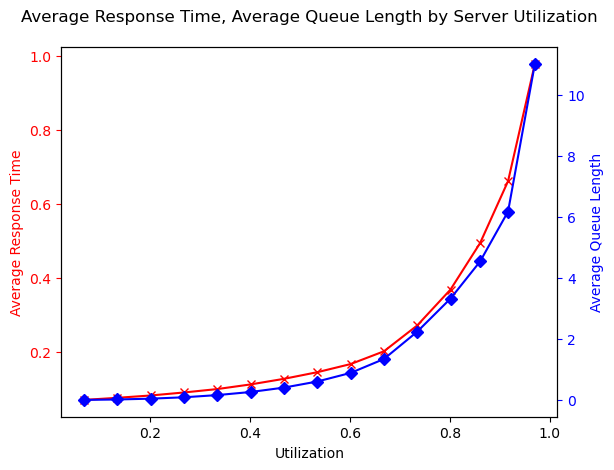

In [40]:
fig, ax1 = plt.subplots()

# Plot the first set of data
ax1.plot(utilizations, avg_resp_time, 'r-', marker='x')
ax1.set_xlabel('Utilization')
ax1.set_ylabel('Average Response Time', color='r')
ax1.tick_params('y', colors='r') # color for the y1 ticks

# Create the second axis object
ax2 = ax1.twinx()
# Plot the second set of data
ax2.plot(utilizations, mean_queue_lens, 'b-', marker='D') # 'b-' is a blue solid line
ax2.set_ylabel('Average Queue Length', color='b')
ax2.tick_params('y', colors='b') # color for the y2 ticks
plt.title('Average Response Time, Average Queue Length by Server Utilization\n')
plt.savefig('2_2: Avg Resp Time, Avg Queue Len by Utilization.png')
plt.show()


In [41]:
########### EVAL 1(a) ###########

In [42]:
df_1a = pd.read_fwf('hw2_eval1_1.txt', header=None)
df_1a.rename(columns={df_1a.columns[0]: 'req_opt'}, inplace=True)

In [43]:
def remove_rows(row):
    return not row['req_opt'].startswith('[')

In [44]:
df_1a = df_1a[df_1a.apply(remove_rows, axis=1)] 

In [45]:
df_1a.reset_index(drop=True, inplace=True)
df_1a

,req_opt
0,"R0:219968.446291,0.050151,219968.446894,219968..."
1,"R1:219968.752110,0.160167,219968.752175,219968..."
2,"R2:219969.006894,0.022009,219969.006935,219969..."
3,"R3:219969.411347,0.146201,219969.411418,219969..."
4,"R4:219969.479460,0.080737,219969.557698,219969..."
...,...
995,"R995:220133.699549,0.027567,220133.796653,2201..."
996,"R996:220134.121523,0.052630,220134.121562,2201..."
997,"R997:220134.153287,0.028426,220134.174236,2201..."
998,"R998:220134.197880,0.021410,220134.202683,2201..."


In [46]:
for i in range(len(df_1a['req_opt'])):
    df_1a['req_opt'][i] = re.sub(r"^(.*):", '', df_1a['req_opt'][i])
    df_1a['req_opt'][i] = re.split(r",", df_1a['req_opt'][i])
    df_1a['req_opt'][i][:] = map(lambda x: float(x), df_1a['req_opt'][i])

In [47]:
df_1a

,req_opt
0,"[219968.446291, 0.050151, 219968.446894, 21996..."
1,"[219968.75211, 0.160167, 219968.752175, 219968..."
2,"[219969.006894, 0.022009, 219969.006935, 21996..."
3,"[219969.411347, 0.146201, 219969.411418, 21996..."
4,"[219969.47946, 0.080737, 219969.557698, 219969..."
...,...
995,"[220133.699549, 0.027567, 220133.796653, 22013..."
996,"[220134.121523, 0.05263, 220134.121562, 220134..."
997,"[220134.153287, 0.028426, 220134.174236, 22013..."
998,"[220134.19788, 0.02141, 220134.202683, 220134...."


In [48]:
tailored_df_1a = pd.DataFrame(columns=['sent_time', 'req_len', 'receipt_time', 'completion_time'])
for i in range(0, len(df_1a)):
    row = df_1a.iloc[i]
    new_row = {'sent_time': row[0][0],\
               'req_len': row[0][1],\
               'receipt_time': row[0][2],\
               'completion_time': row[0][3]
              }
    tailored_df_1a.loc[len(tailored_df_1a)] = new_row
    
print(tailored_df_1a)

         sent_time   req_len   receipt_time  completion_time
0    219968.446291  0.050151  219968.446894    219968.497161
1    219968.752110  0.160167  219968.752175    219968.912415
2    219969.006894  0.022009  219969.006935    219969.028961
3    219969.411347  0.146201  219969.411418    219969.557644
4    219969.479460  0.080737  219969.557698    219969.638458
..             ...       ...            ...              ...
995  220133.699549  0.027567  220133.796653    220133.824220
996  220134.121523  0.052630  220134.121562    220134.174200
997  220134.153287  0.028426  220134.174236    220134.202660
998  220134.197880  0.021410  220134.202683    220134.224090
999  220134.320090  0.113213  220134.320119    220134.433330

[1000 rows x 4 columns]


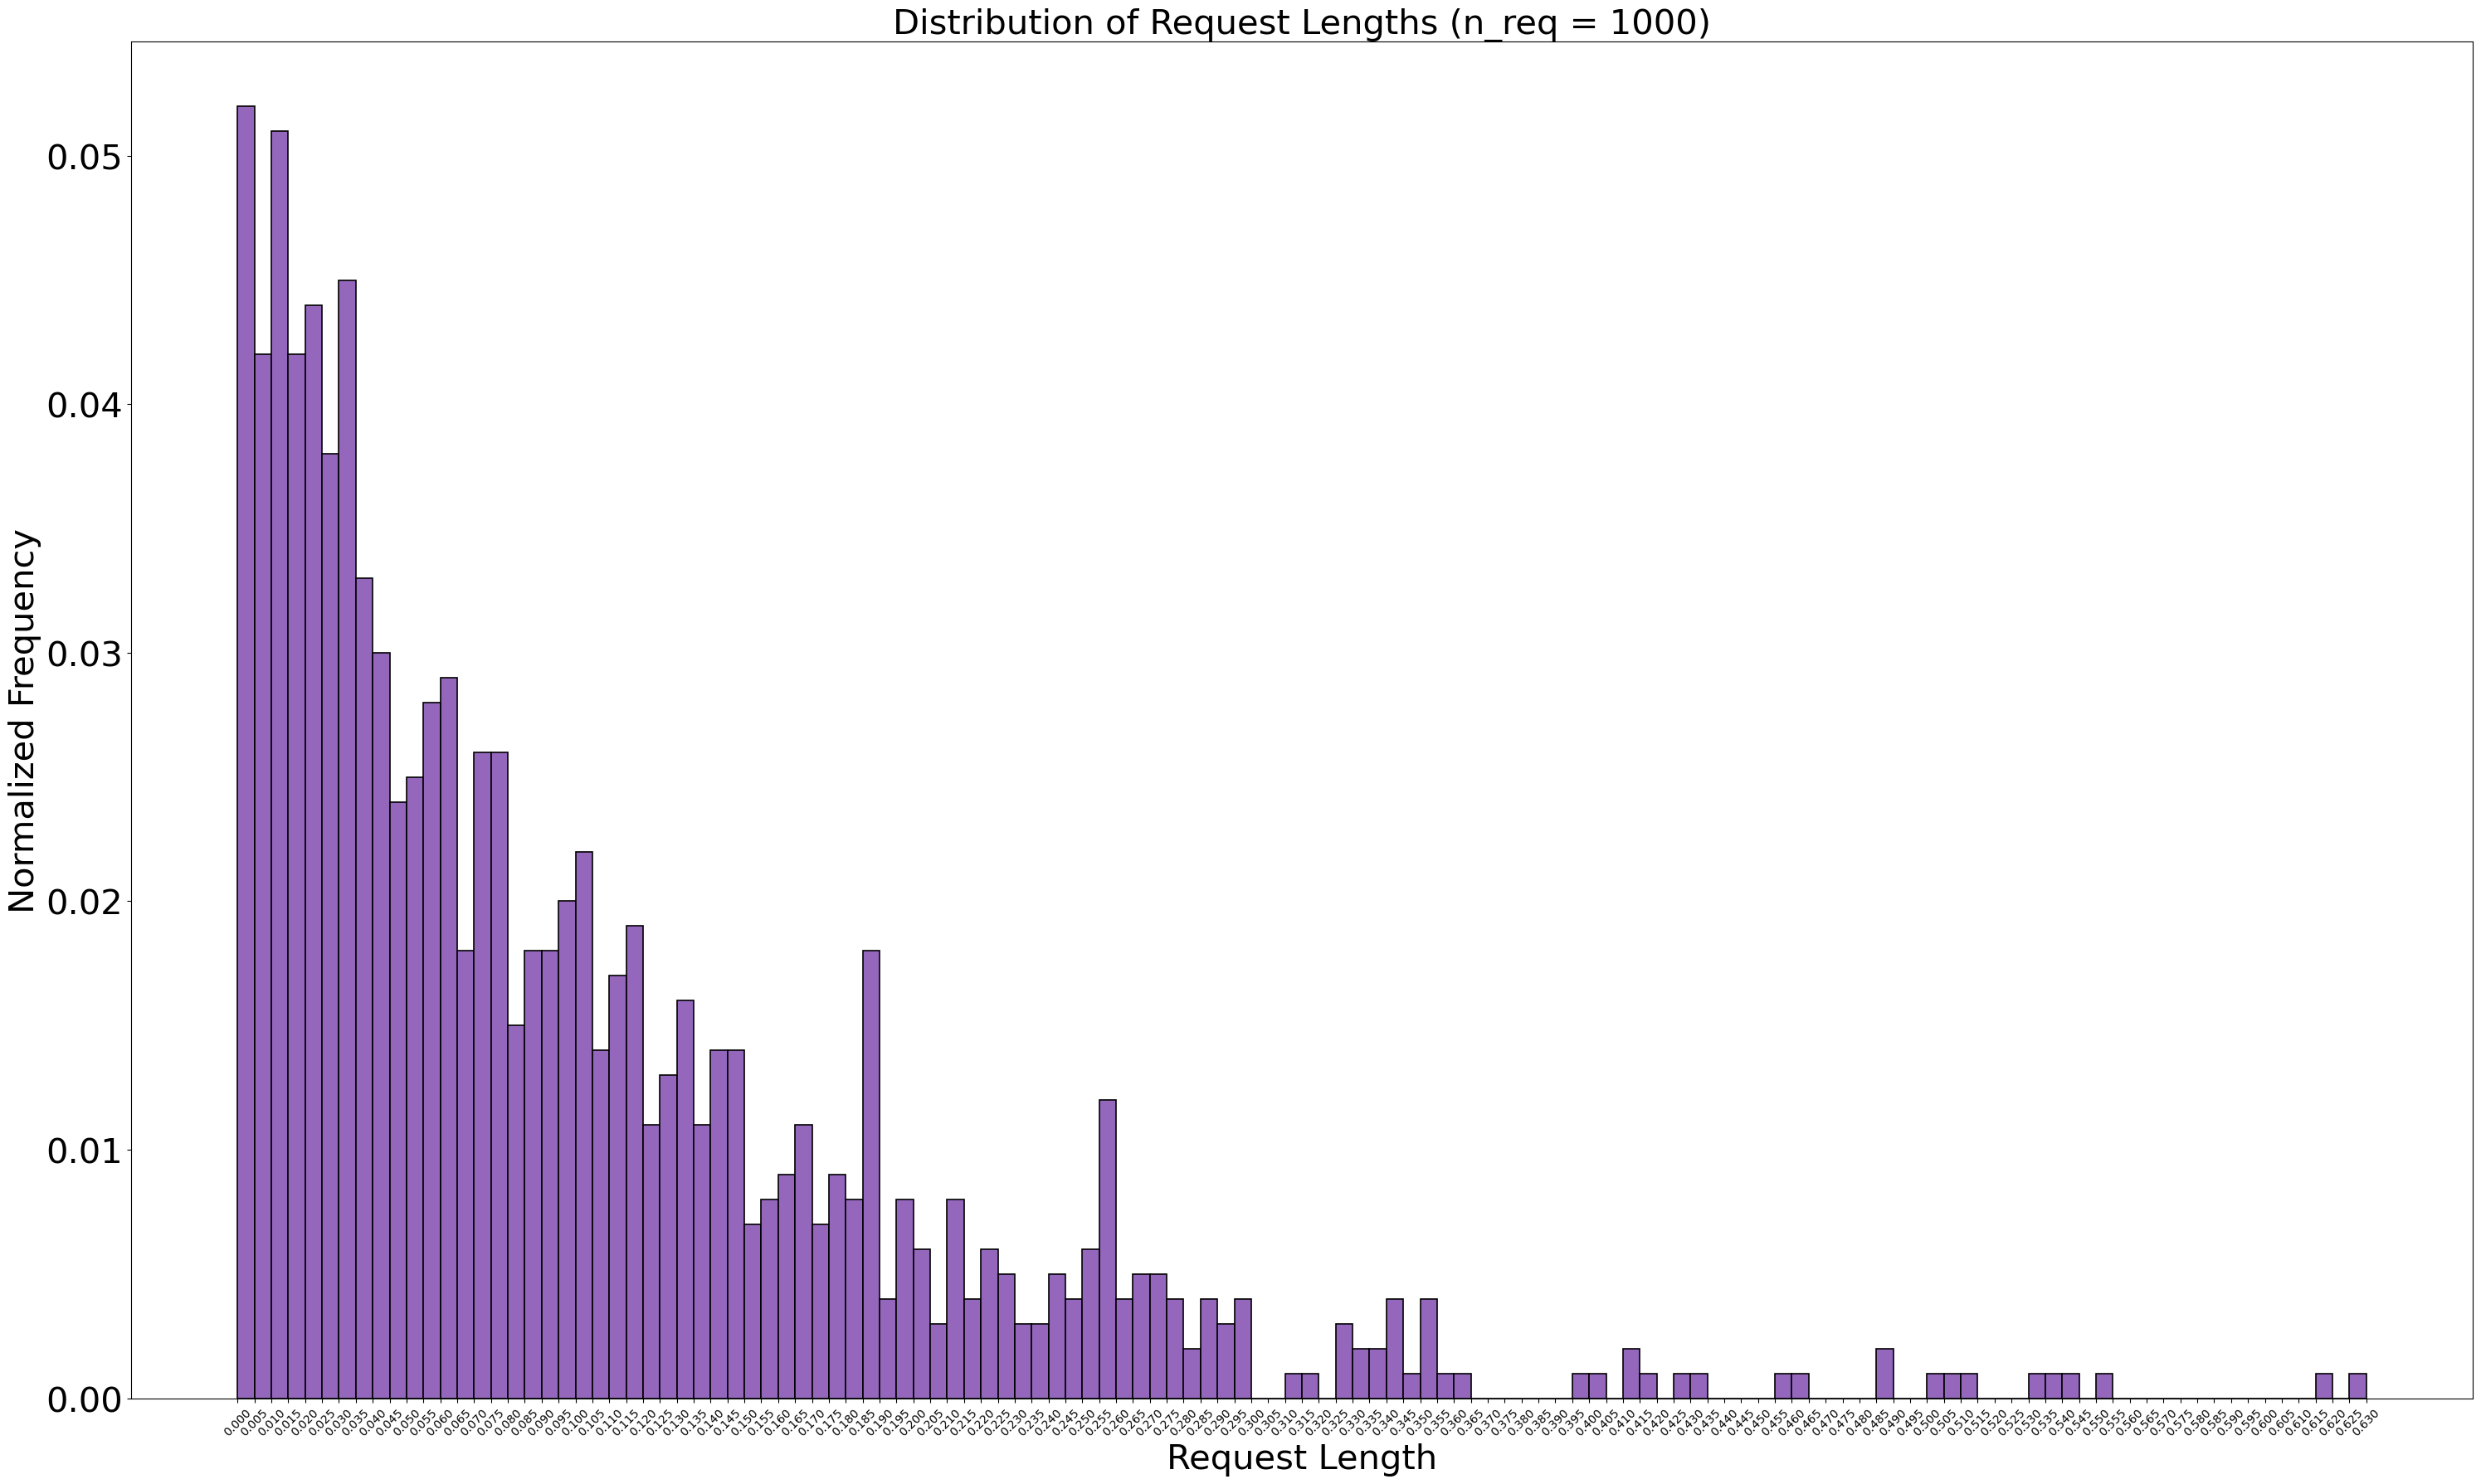

In [49]:
bins_partitioned = np.arange(0, max(tailored_df_1a['req_len'])+0.005, 0.005)
hist, _ = np.histogram(tailored_df_1a['req_len'], bins=bins_partitioned)
normalized_hist = hist / sum(hist)
plt.figure(figsize=(30, 18))
plt.bar(bins_partitioned[:-1], normalized_hist, width=0.005, align='edge', color='C4', edgecolor='black', linewidth=1.2)
plt.xticks(bins_partitioned, rotation=45)
plt.yticks(fontsize = 30)
plt.xlabel('Request Length', fontsize=30)
plt.ylabel('Normalized Frequency', fontsize=30)
plt.title('Distribution of Request Lengths (n_req = 1000)', fontsize=30)
plt.tight_layout()
plt.savefig('1_1: Distribution of Request Lengths.png')
plt.show()


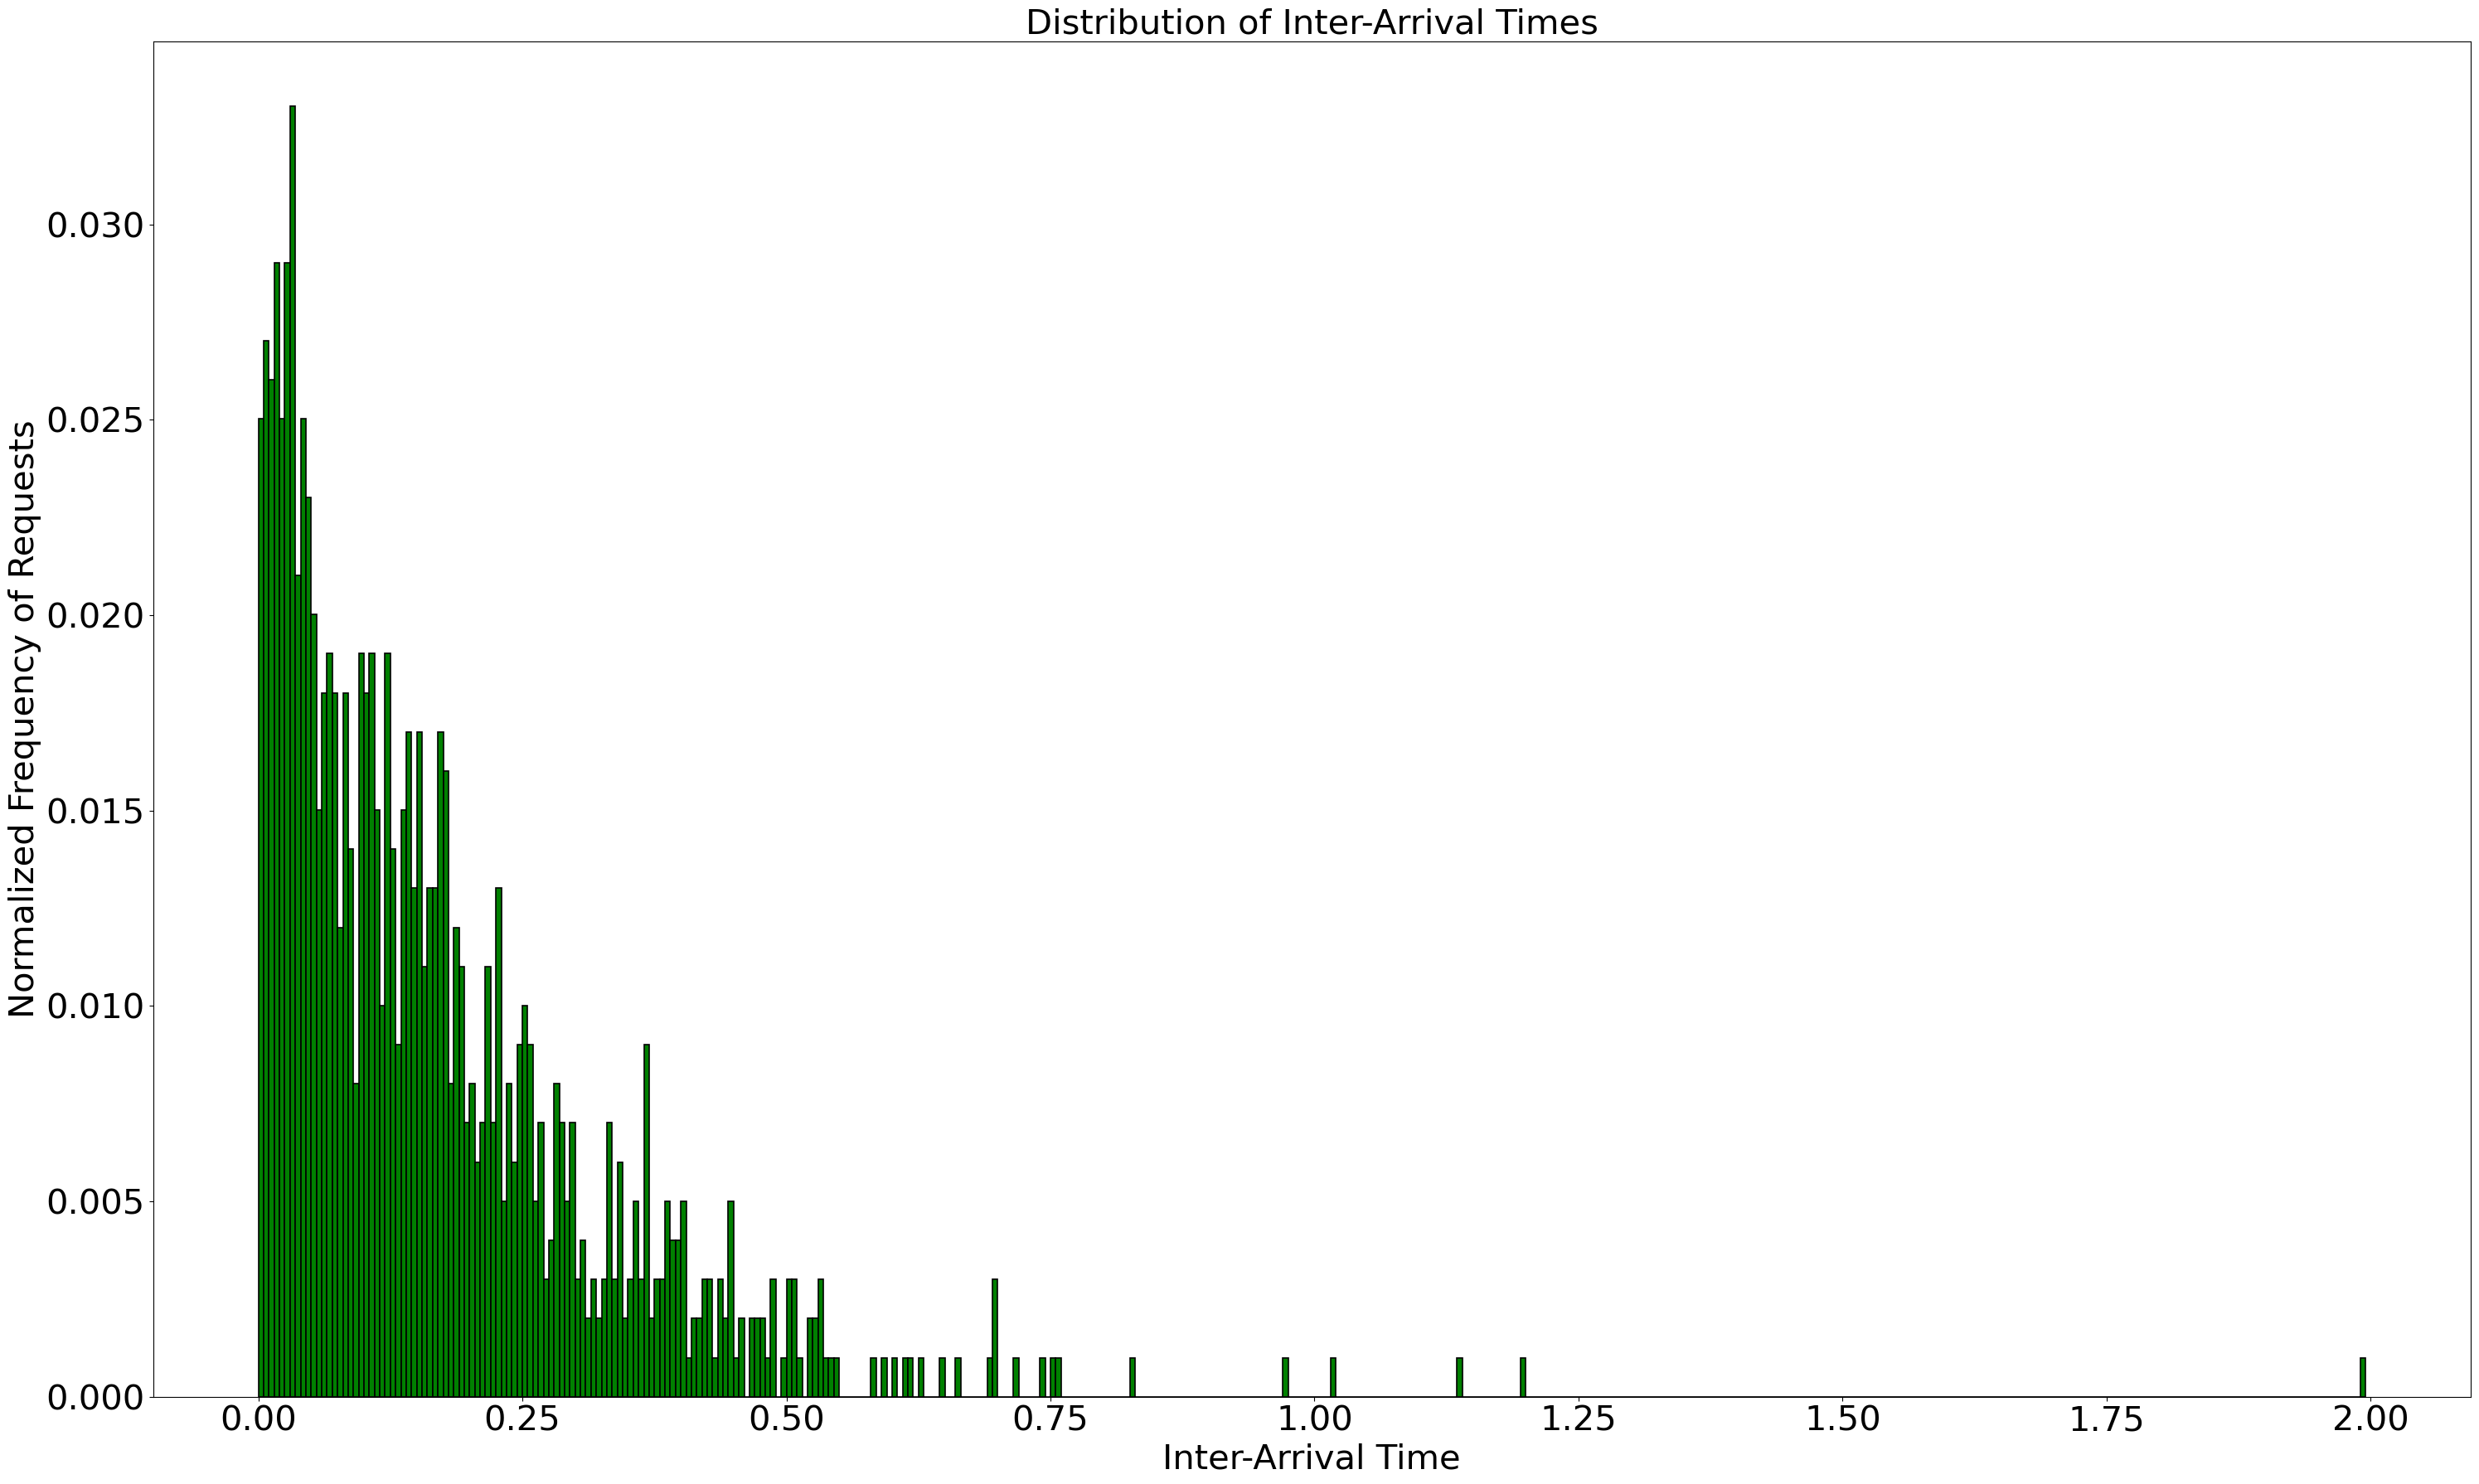

In [50]:
tailored_df_1a['inter_arrival'] = tailored_df_1a['sent_time'].diff().dropna()
bin_edges = np.arange(0, tailored_df_1a['inter_arrival'].max() + 0.005, 0.005)
hist, _ = np.histogram(tailored_df_1a['inter_arrival'], bins=bin_edges)
normalized_hist = hist / (len(tailored_df_1a) - 1)  # 999 inter-arrival 
plt.figure(figsize=(30, 18))
plt.bar(bin_edges[:-1], normalized_hist, width=0.005, align='edge', color='g', edgecolor='black', linewidth=1.2)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Inter-Arrival Time', fontsize=30)
plt.ylabel('Normalized Frequency of Requests', fontsize=30)
plt.title('Distribution of Inter-Arrival Times', fontsize=30)
plt.tight_layout()
plt.savefig('1_2: Distribution of Inter-Arrival Times.png')
plt.show()

In [51]:
tailored_df_1a['sent_time'].diff().dropna()

1      0.305819
2      0.254784
3      0.404453
4      0.068113
5      0.054271
         ...   
995    0.172838
996    0.421974
997    0.031764
998    0.044593
999    0.122210
Name: sent_time, Length: 999, dtype: float64

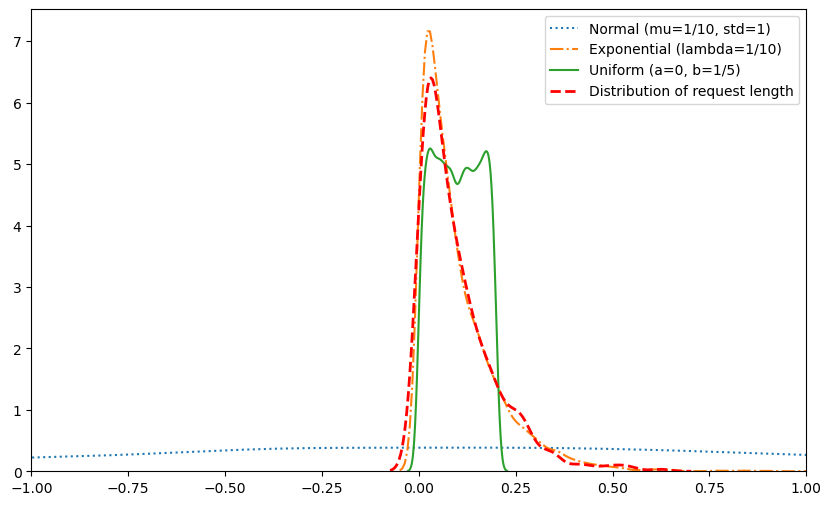

In [52]:
import seaborn as sns

num_samples = 10000

# Normal Distribution (mu=1/10, std=1)
normal_samples = np.random.normal(loc=1/10, scale=1, size=num_samples)

# Exponential Distribution (mu=lambda=1/10)
exp_samples = np.random.exponential(scale=1/10, size=num_samples)

# Uniform Distribution (mu = 1/10 = (a+b)/2; if a=0, then b=1/5)
uniform_samples = np.random.uniform(low=0, high=1/5, size=num_samples)

plt.figure(figsize=(10, 6))
sns.kdeplot(normal_samples, label='Normal (mu=1/10, std=1)', linestyle=':')
sns.kdeplot(exp_samples, label='Exponential (lambda=1/10)', linestyle='-.')
sns.kdeplot(uniform_samples, label='Uniform (a=0, b=1/5)')
sns.kdeplot(tailored_df_1a['req_len'], color='red', label='Distribution of request length', linewidth=2, linestyle='--')

plt.xlim(-1, 1)
plt.legend(loc='upper right')
plt.xlabel('')
plt.ylabel('')
plt.savefig('1_3: Distribution Comparisons (req_len).png')
plt.show()


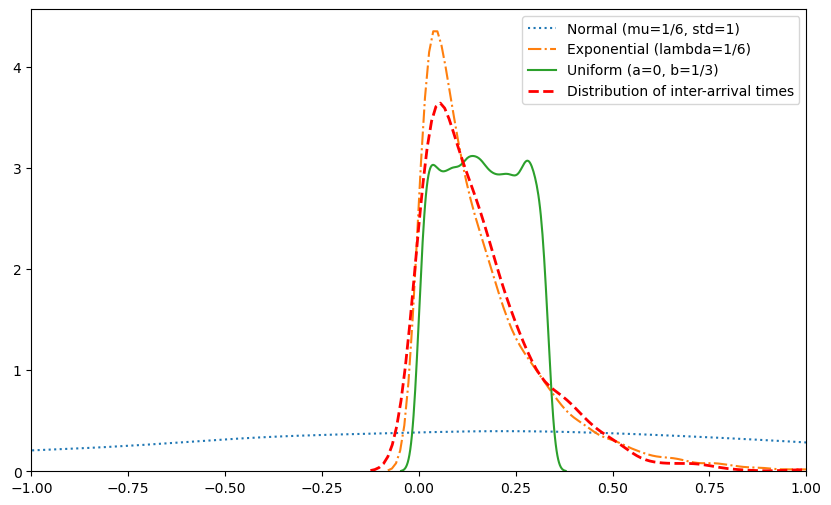

In [53]:
num_samples = 10000

# Normal Distribution (mu=1/6, std=1)
normal_samples = np.random.normal(loc=1/6, scale=1, size=num_samples)

# Exponential Distribution (mu=lambda=1/6)
exp_samples = np.random.exponential(scale=1/6, size=num_samples)

# Uniform Distribution (mu = 1/6 = (a+b)/2; if a=0, then b=1/3)
uniform_samples = np.random.uniform(low=0, high=1/3, size=num_samples)

plt.figure(figsize=(10, 6))
sns.kdeplot(normal_samples, label='Normal (mu=1/6, std=1)', linestyle=':')
sns.kdeplot(exp_samples, label='Exponential (lambda=1/6)', linestyle='-.')
sns.kdeplot(uniform_samples, label='Uniform (a=0, b=1/3)')
sns.kdeplot(tailored_df_1a['inter_arrival'], color='red', label='Distribution of inter-arrival times', linewidth=2, linestyle='--')

plt.xlim(-1, 1)
plt.legend(loc='upper right')
plt.xlabel('')
plt.ylabel('')
plt.savefig('1_4: Distribution Comparisons (inter_arrival).png')
plt.show()
